# K2 Single Transits Project
In this project we will take a look at the long list of Single Transits and Eclipse collected by <a href="https://arxiv.org/abs/1802.05823">LaCourse \& Jacobs (2018)</a>. We are for the most part interested in looking for planets with a circumplanetary disk so are mostly concerned with deep asymmetric eclipses and will thus focus on the targets that have <strong>Deep</strong> in the <em>Comments</em> column of the table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import everest

%matplotlib inline

In [2]:
filename = 'lacourse_jacobs_table.txt'
f = open(filename, 'r')
lines = f.readlines()
f.close()

campaign = []
epic_id  = []
kp_mag   = []
teff     = []
Rs       = []
BJD0     = []
depth    = []
duration = []
comments = []

for line in lines:
    try:
        data = line.split()
        c, e, k, t, r, b, d, D = data[:8]
        C = ' '.join(data[8:])
        if 'Deep' in C:
            campaign.append(c)
            epic_id.append(int(e))
            kp_mag.append(float(k))
            teff.append(float(t))
            Rs.append(float(r))
            BJD0.append(float(b))
            depth.append(int(d))
            duration.append(float(D))
            comments.append(C)
    except:
        pass

interesting = (campaign, epic_id, kp_mag, teff, Rs, BJD0, depth, duration, comments)
print('CAMP  EPIC_ID  KP_MAG  TEFF   Rs    BJD_0   depth    dt     comments')
print('==== ========= ====== ===== ====== ======= ======= ===== ===============')
for c, e, k, t, r, b, d, D, C in zip(*interesting):
    temp = '%s %i %s %s %s %.2f %s %s %s'
    pars = (c.ljust(4), e, ('%.2f'%k).rjust(6), ('%i'%t).rjust(5), ('%.2f'%r).rjust(6), b, ('%i'%d).rjust(7), ('%.2f'%D).rjust(5), C)
    print(temp % pars)

CAMP  EPIC_ID  KP_MAG  TEFF   Rs    BJD_0   depth    dt     comments
==== ========= ====== ===== ====== ======= ======= ===== ===============
C14  248555345  11.60  5192   6.07 3106.65  125978 15.69 Deep
C14  201792207  15.36  4101   0.49 3105.89  465848  3.92 Deep; secondary eclipse
C13  247692298   9.72 10398   3.21 3006.21  188904 10.30 Deep
C13  246732631  10.78  8224   2.07 3003.38  137259 21.58 Deep; secondary eclipse
C13  246849982  12.52  9715   1.86 3061.16  235239 26.48 Deep
C13  247795097  13.00  3606 166.46 3001.92  192036 12.75 Deep
C13  247594337  13.64  4908   6.91 2997.60  175064 12.26 Deep
C13  247967714  13.75  5076   2.01 3012.08  258337  4.90 Deep
C13  247814074  14.65  6245   1.77 3050.16  443535 11.77 Deep; secondary eclipse
C12  246194159   9.48  6340   1.82 2914.39  378934  8.83 Deep; secondary eclipse
C12  246359551  11.15  4696   5.39 2914.36  204068 21.09 Deep; secondary eclipse
C12  246394998  12.53  5877   1.13 2913.99  438858  5.39 Deep; secondary eclipse


Let's take a look at some information

In [3]:
# categorise
deep = 0
secondary = 0
flat_bottom = 0
asymmetric = 0
for comment in comments:
    if 'Deep' in comment:
        deep += 1
    if 'secondary' in comment:
        secondary += 1
    if 'flat' in comment:
        flat_bottom += 1
    if 'asymmetric' in comment:
        asymmetric += 1

# print details
print('number of "Deep" sources = %i' % deep)
print('number of "secondary eclipses" = %i' % secondary)
print('number of "flat-bottom" = %i' % flat_bottom)
print('number of "asymmetric" = %i' % asymmetric)

number of "Deep" sources = 48
number of "secondary eclipses" = 16
number of "flat-bottom" = 4
number of "asymmetric" = 1


### Extract and Plot EPIC 2202
We do this using the everest pipeline where an EPIC ID is inserted into the code block

> lightcurve = everest.Everest(EPIC_ID)

## Making plots of the lightcurves

In [4]:
#extracting the lightcurve
EPIC2202 = everest.Everest(220208795)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 220208795.


INFO  [everest.user.plot()]: Plotting the light curve...


C:\Users\lvand\Anaconda3\lib\site-packages\everest\user.py:791: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
C:\Users\lvand\Anaconda3\lib\site-packages\everest\user.py:807: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


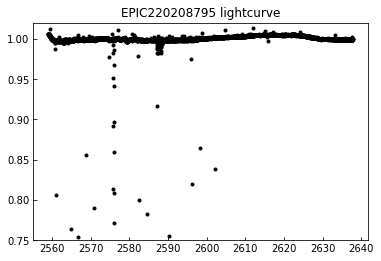

DEBUG [matplotlib.axes._base._update_title_position()]: top of axes not in the figure, so title not moved
DEBUG [matplotlib.axes._base._update_title_position()]: top of axes not in the figure, so title not moved
DEBUG [matplotlib.axes._base._update_title_position()]: top of axes not in the figure, so title not moved
DEBUG [matplotlib.axes._base._update_title_position()]: top of axes not in the figure, so title not moved


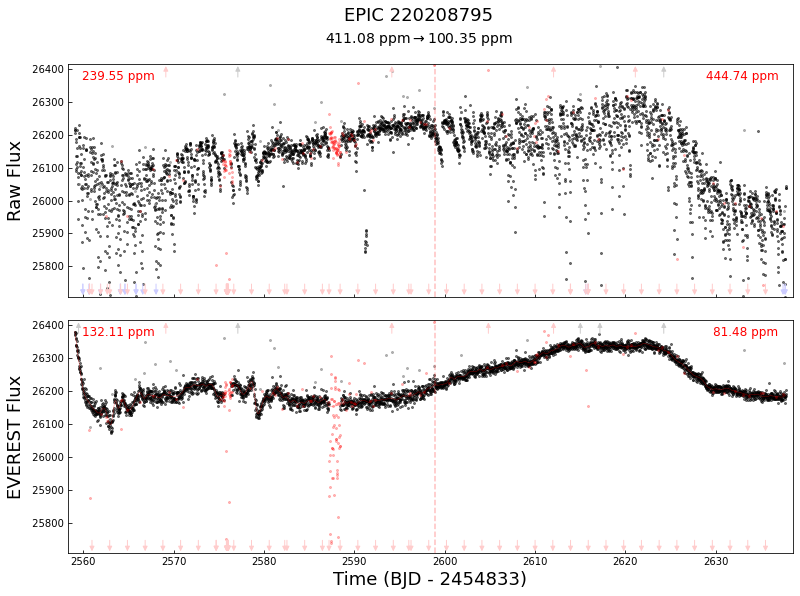

In [18]:
#plotting the EPIC2202 lightcurve with Everest and matplotlib
fluxmean = np.median(EPIC2202.fcor[~np.isnan(EPIC2202.fcor)])

plt.plot(EPIC2202.time, EPIC2202.fcor/fluxmean, "k.")
plt.title("EPIC220208795 lightcurve")
plt.ylim(0.75,1.02)
EPIC2202.plot()

Text(0.5, 0, 'Time (days)')

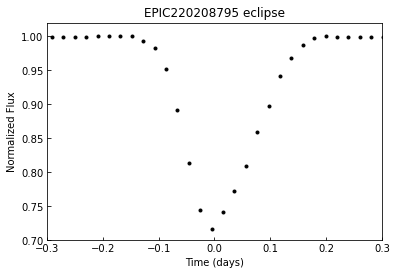

In [12]:
#Zooming in to the eclipse
plt.plot(EPIC2202.time-2575.93, EPIC2202.fcor/fluxmean, "k.")
plt.title("EPIC220208795 eclipse")
plt.xlim(-0.3,0.3)
plt.ylim(0.7,1.02)
plt.ylabel("Normalized Flux")
plt.xlabel("Time (days)")

## Saving the lightcurve and eclipse

In [20]:
# extract data 220208795
time = EPIC2202.time              # time
flux  = EPIC2202.fcor            # corrected flux
error = EPIC2202.cdpp / 1e6        # Combined Differential Photometric Precision in ppm
error *= np.ones_like(flux)       # making an error array

# remove nan's and select for quality
quality = EPIC2202.quality
quality_mask = (quality == 0)
good_time = EPIC2202.time[quality_mask]
good_flux = EPIC2202.fcor[quality_mask]
good_error = error[quality_mask]

mask = ~np.isnan(good_flux)
good_time  = good_time[mask]
good_flux  = good_flux[mask]
good_error = good_error[mask]

# normalise flux
good_flux  = good_flux / np.median(good_flux)

In [21]:
# save 220208795
data_everest = np.vstack((good_time, good_flux, good_error)).T
np.savetxt('data 2202/everest_lightcurve2202.txt', data_everest, 
           header='BJD-2454833, Flux, Error')

## 220208795

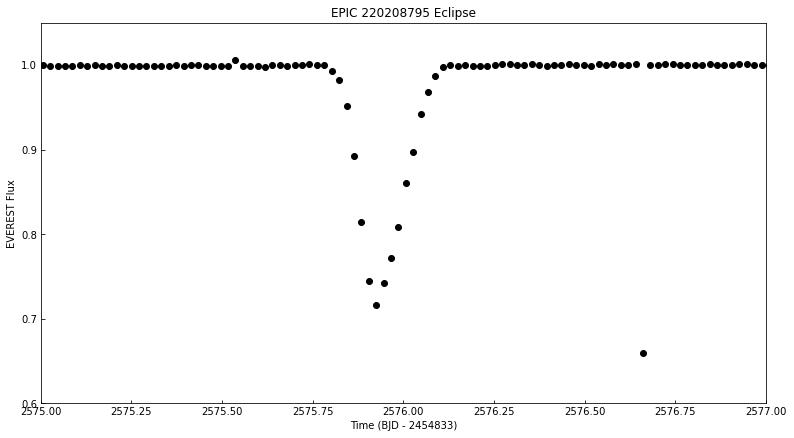

In [11]:
# plot the eclipse 
plt.figure(figsize=(13,7))
plt.xlim(2575,2577)
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('EVEREST Flux')
plt.title('EPIC 220208795 Eclipse')
plt.errorbar(time, flux, yerr=error, fmt='o', color='k')
plt.ylim(0.6,1.05)
plt.show()

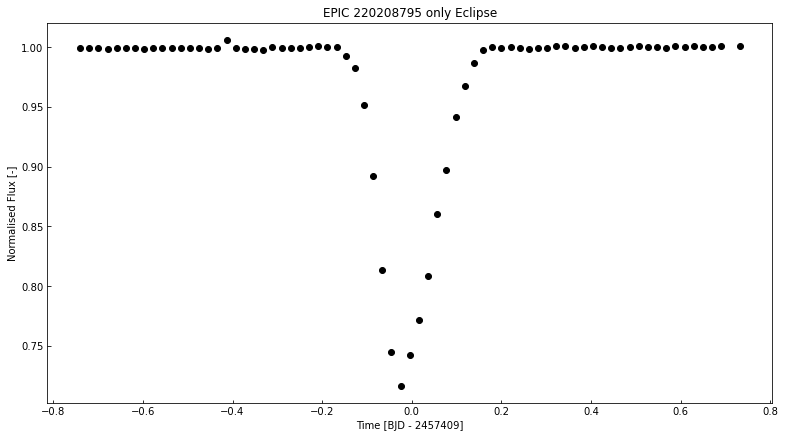

In [12]:
# mask out eclipse
eclipse_mask = (time > 2575.2) * (time < 2576.7)
#stellar_mask1 = ~eclipse_mask1
#stellar_mask = (time < 3015)

# mask out flux outliers 
flux_mask = flux > 0.70

# full mask
mask = flux_mask * eclipse_mask # * stellar_mask)(

# ec = eclipse 
time_ec  = time[mask]-2575.95    # center around zero
flux_ec  = flux[mask]
error_ec = error[mask]

# plot to check
plt.figure(figsize=(13,7))
plt.xlabel('Time [BJD - 2457409]')
plt.ylabel('Normalised Flux [-]')
plt.title('EPIC 220208795 only Eclipse')
plt.errorbar(time_ec, flux_ec, yerr=error_ec, fmt='o', color='k')
plt.show()

In [16]:
# save eclipse 220208795
data_eclipse = np.vstack((time_ec, flux_ec, error_ec)).T
np.savetxt('data 2202/eclipse_lightcurve2202.txt', data_eclipse, 
           header='BJD-2457409, Flux, Error')